**Explanations**

In [ ]:
'''
(c) 2022 Twente Medical Systems International B.V., Oldenzaal The Netherlands

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

#######  #     #   #####   #
   #     ##   ##  #        
   #     # # # #  #        #
   #     #  #  #   #####   #
   #     #     #        #  #
   #     #     #        #  #
   #     #     #  #####    #

/**
 * @file ${example_read_data.py} 
 * @brief This example shows how to read data from a .Poly5 file. Next to this, 
 * the channel reordering strategy for the Textile HD-EMG grid is demonstrated.
 * Finally, conversion to an MNE-Python object is shown.
 *
 */


'''

# I added pyxdf library in my MNE environment (by typing "conda install -c conda-forge pyxdf" in the terminal)


**Import libraries**

In [10]:
import sys
from os.path import join, dirname, realpath, exists
import json
import numpy as np

# the following libraries I added myself (useful for analysis)
import os
import sys
import importlib
import json
from dataclasses import dataclass, field, fields
from itertools import compress
import csv
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import signal
import openpyxl
from openpyxl import Workbook, load_workbook
import xlrd
#MNE
import mne
from mne.time_frequency import tfr_morlet
from importlib import reload 

**Load Poly5reader**

In [11]:
# define current working directory (the one that contains this notebook): this is the project_path
os.chdir('c:\\Users\\Juliette\\Research\\Projects\\Synchronization project\\Code\\Synchronization')
project_path = os.getcwd()

# change temporarily the working directory to go fetch the poly5 reader: this is the code_path
os.chdir(os.path.dirname(os.getcwd()))
os.chdir(os.path.join(os.getcwd(), 'tmsi-python-interface-main'))
code_path = os.getcwd()

print (f'working dir for analysis:{project_path}')
print (f'working dir to go fetch Poly5 reader:{code_path}')

#fetch the poly5 reader
from TMSiFileFormats.file_readers import Poly5Reader

# set the working directory back to the project_path
os.chdir(project_path)

working dir for analysis:c:\Users\Juliette\Research\Projects\Synchronization project\Code\Synchronization
working dir to go fetch Poly5 reader:c:\Users\Juliette\Research\Projects\Synchronization project\Code\tmsi-python-interface-main


**Sub-033 (with Jenny)**

Condition: Sub-033 18MFU MedOn Stim Off Streaming Rest/Sync:

In [ ]:
# OPEN THE TMSI FILE
TMSi_data = Poly5Reader()
# When no arguments are given, a pop-up window allows you to select the file you want to read. 
# You can also use data=Poly5Reader(full_path) to load a file. Note that the full file path is required here.

# CONVERT TO MNE

# Extract the samples and channel names from the Poly5Reader object
samples = TMSi_data.samples
ch_names = TMSi_data.ch_names

# Conversion to MNE raw array

toMNE = True
mne_object = TMSi_data.read_data_MNE()

# PLOT (ALL) CHANNELS OF THE TMSI DATA RECORDED

# Retrieve the MNE RawArray info and sample data
info_mne = mne_object.info
samples_mne = mne_object._data
    
# mne_object.plot(start = 5, duration = 5, n_channels = 2) (only if I want to plot in interactive viewer)

n_chan = len(mne_object.ch_names)
time_duration = (mne_object.n_times/mne_object.info['sfreq']).astype(float)
time_duration_ms=time_duration*1000

print(     
	f'The data object has:\n\t{mne_object.n_times} time samples,'      
	f'\n\tand a sample frequency of {mne_object.info["sfreq"]} Hz'      
	f'\n\twith a recording duration of {time_duration} seconds.'      
	f'\n\t{n_chan} channels were labeled as \n{mne_object.ch_names}.')

x_time=np.arange(0,time_duration_ms,time_duration_ms/mne_object.n_times)

BIP01 = mne_object.get_data()[0]
BIP02 = mne_object.get_data()[1]
BIP03 = mne_object.get_data()[2]
BIP04 = mne_object.get_data()[3]
XRIGHT = mne_object.get_data()[4]
YRIGHT = mne_object.get_data()[5]
ZRIGHT = mne_object.get_data()[6]
XLEFT = mne_object.get_data()[7]
YLEFT = mne_object.get_data()[8]
ZLEFT = mne_object.get_data()[9]

fig, axs = plt.subplots(10)
fig.suptitle('sub-033 18 MFU BrainSense Streaming MedON StimOff')
axs[0].plot(x_time,BIP01,color='blue')
axs[0].set_title('BIP01')
axs[1].plot(x_time,BIP02,color='green')
axs[1].set_title('BIP02')
axs[2].plot(x_time,BIP03,color='orange')
axs[2].set_title('BIP03')
axs[3].plot(x_time,BIP04,color='red')
axs[3].set_title('BIP04')
axs[4].plot(x_time,XRIGHT,color='pink')
axs[4].set_title('XRIGHT')
axs[5].plot(x_time,YRIGHT,color='purple')
axs[5].set_title('YRIGHT')
axs[6].plot(x_time,ZRIGHT,color='black')
axs[6].set_title('ZRIGHT')
axs[7].plot(x_time,XLEFT,color='brown')
axs[7].set_title('XLEFT')
axs[8].plot(x_time,YLEFT)
axs[8].set_title('YLEFT')
axs[9].plot(x_time,ZLEFT,color='grey')
axs[9].set_title('ZLEFT')
axs[9].set_xlabel('Time (ms)')
for ax in axs.flat:
    ax.label_outer()
fig.set_size_inches(28.5, 18.5)	


Condition: Sub-033 18MFU MedOn Stim Off Indefinite Streaming:

In [ ]:
TMSi_data = Poly5Reader()

# Extract the samples and channel names from the Poly5Reader object
samples = TMSi_data.samples
ch_names = TMSi_data.ch_names

# Conversion to MNE raw array

toMNE = True
mne_object = TMSi_data.read_data_MNE()

# Retrieve the MNE RawArray info and sample data
info_mne = mne_object.info
samples_mne = mne_object._data
    
# mne_object.plot(start = 5, duration = 5, n_channels = 2) (only if I want to plot in interactive viewer)

n_chan = len(mne_object.ch_names)
time_duration = (mne_object.n_times/mne_object.info['sfreq']).astype(float)
time_duration_ms=time_duration*1000

print(     
	f'The data object has:\n\t{mne_object.n_times} time samples,'      
	f'\n\tand a sample frequency of {mne_object.info["sfreq"]} Hz'      
	f'\n\twith a recording duration of {time_duration} seconds.'      
	f'\n\t{n_chan} channels were labeled as \n{mne_object.ch_names}.')

x_time=np.arange(0,time_duration_ms,time_duration_ms/mne_object.n_times)

BIP01 = mne_object.get_data()[0]
BIP02 = mne_object.get_data()[1]
BIP03 = mne_object.get_data()[2]
BIP04 = mne_object.get_data()[3]
XRIGHT = mne_object.get_data()[4]
YRIGHT = mne_object.get_data()[5]
ZRIGHT = mne_object.get_data()[6]
XLEFT = mne_object.get_data()[7]
YLEFT = mne_object.get_data()[8]
ZLEFT = mne_object.get_data()[9]

fig, axs = plt.subplots(10)
fig.suptitle('sub-033 18 MFU Indefinite Streaming MedON StimOff')
axs[0].plot(x_time,BIP01,color='blue')
axs[0].set_title('BIP01')
axs[1].plot(x_time,BIP02,color='green')
axs[1].set_title('BIP02')
axs[2].plot(x_time,BIP03,color='orange')
axs[2].set_title('BIP03')
axs[3].plot(x_time,BIP04,color='red')
axs[3].set_title('BIP04')
axs[4].plot(x_time,XRIGHT,color='pink')
axs[4].set_title('XRIGHT')
axs[5].plot(x_time,YRIGHT,color='purple')
axs[5].set_title('YRIGHT')
axs[6].plot(x_time,ZRIGHT,color='black')
axs[6].set_title('ZRIGHT')
axs[7].plot(x_time,XLEFT,color='brown')
axs[7].set_title('XLEFT')
axs[8].plot(x_time,YLEFT)
axs[8].set_title('YLEFT')
axs[9].plot(x_time,ZLEFT,color='grey')
axs[9].set_title('ZLEFT')
axs[9].set_xlabel('Time (ms)')
for ax in axs.flat:
    ax.label_outer()
fig.set_size_inches(28.5, 18.5)	

Condition: Sub-033 18MFU MedOff Stim Off Streaming Rest/Sync:

In [ ]:
TMSi_data = Poly5Reader()

# Extract the samples and channel names from the Poly5Reader object
samples = TMSi_data.samples
ch_names = TMSi_data.ch_names

# Conversion to MNE raw array

toMNE = True
mne_object = TMSi_data.read_data_MNE()

# Retrieve the MNE RawArray info and sample data
info_mne = mne_object.info
samples_mne = mne_object._data
    
# mne_object.plot(start = 5, duration = 5, n_channels = 2) (only if I want to plot in interactive viewer)

n_chan = len(mne_object.ch_names)
time_duration = (mne_object.n_times/mne_object.info['sfreq']).astype(float)
time_duration_ms=time_duration*1000

print(     
	f'The data object has:\n\t{mne_object.n_times} time samples,'      
	f'\n\tand a sample frequency of {mne_object.info["sfreq"]} Hz'      
	f'\n\twith a recording duration of {time_duration} seconds.'      
	f'\n\t{n_chan} channels were labeled as \n{mne_object.ch_names}.')

x_time=np.arange(0,time_duration_ms,time_duration_ms/mne_object.n_times)

EEG = mne_object.get_data()[0]
BIP01 = mne_object.get_data()[1]
BIP02 = mne_object.get_data()[2]
BIP03 = mne_object.get_data()[3]
BIP04 = mne_object.get_data()[4]
XRIGHT = mne_object.get_data()[5]
YRIGHT = mne_object.get_data()[6]
ZRIGHT = mne_object.get_data()[7]
XLEFT = mne_object.get_data()[8]
YLEFT = mne_object.get_data()[9]
ZLEFT = mne_object.get_data()[10]

fig, axs = plt.subplots(11)
fig.suptitle('sub-033 18 MFU BrainSense Streaming MedON StimOff')
axs[0].plot(x_time,EEG,color='magenta')
axs[0].set_title('EEG')
axs[1].plot(x_time,BIP01,color='blue')
axs[1].set_title('BIP01')
axs[2].plot(x_time,BIP02,color='green')
axs[2].set_title('BIP02')
axs[3].plot(x_time,BIP03,color='orange')
axs[3].set_title('BIP03')
axs[4].plot(x_time,BIP04,color='red')
axs[4].set_title('BIP04')
axs[5].plot(x_time,XRIGHT,color='pink')
axs[5].set_title('XRIGHT')
axs[6].plot(x_time,YRIGHT,color='purple')
axs[6].set_title('YRIGHT')
axs[7].plot(x_time,ZRIGHT,color='black')
axs[7].set_title('ZRIGHT')
axs[8].plot(x_time,XLEFT,color='brown')
axs[8].set_title('XLEFT')
axs[9].plot(x_time,YLEFT)
axs[9].set_title('YLEFT')
axs[10].plot(x_time,ZLEFT,color='grey')
axs[10].set_title('ZLEFT')
axs[10].set_xlabel('Time (ms)')
for ax in axs.flat:
    ax.label_outer()
fig.set_size_inches(28.5, 18.5)	

In [ ]:
mne_object.plot(start = 5, duration = 5, n_channels = 2)

# Stim artefacts have been picked up in BIP02 (bipolar electrode around the IPG) and in BIP03 (ECG near the heart)


Condition: Sub-033 18MFU MedOff Stim Off Indefinite Streaming:

In [ ]:
TMSi_data = Poly5Reader()

# Extract the samples and channel names from the Poly5Reader object
samples = TMSi_data.samples
ch_names = TMSi_data.ch_names

# Conversion to MNE raw array

toMNE = True
mne_object = TMSi_data.read_data_MNE()

# Retrieve the MNE RawArray info and sample data
info_mne = mne_object.info
samples_mne = mne_object._data
    
# mne_object.plot(start = 5, duration = 5, n_channels = 2) (only if I want to plot in interactive viewer)

n_chan = len(mne_object.ch_names)
time_duration = (mne_object.n_times/mne_object.info['sfreq']).astype(float)
time_duration_ms=time_duration*1000

print(     
	f'The data object has:\n\t{mne_object.n_times} time samples,'      
	f'\n\tand a sample frequency of {mne_object.info["sfreq"]} Hz'      
	f'\n\twith a recording duration of {time_duration} seconds.'      
	f'\n\t{n_chan} channels were labeled as \n{mne_object.ch_names}.')

x_time=np.arange(0,time_duration_ms,time_duration_ms/mne_object.n_times)

EEG = mne_object.get_data()[0]
BIP01 = mne_object.get_data()[1]
BIP02 = mne_object.get_data()[2]
BIP03 = mne_object.get_data()[3]
BIP04 = mne_object.get_data()[4]
XRIGHT = mne_object.get_data()[5]
YRIGHT = mne_object.get_data()[6]
ZRIGHT = mne_object.get_data()[7]
XLEFT = mne_object.get_data()[8]
YLEFT = mne_object.get_data()[9]
ZLEFT = mne_object.get_data()[10]

fig, axs = plt.subplots(11)
fig.suptitle('sub-033 18 MFU Indefinite Streaming MedOff StimOff')
axs[0].plot(x_time,EEG,color='magenta')
axs[0].set_title('EEG')
axs[1].plot(x_time,BIP01,color='blue')
axs[1].set_title('BIP01')
axs[2].plot(x_time,BIP02,color='green')
axs[2].set_title('BIP02')
axs[3].plot(x_time,BIP03,color='orange')
axs[3].set_title('BIP03')
axs[4].plot(x_time,BIP04,color='red')
axs[4].set_title('BIP04')
axs[5].plot(x_time,XRIGHT,color='pink')
axs[5].set_title('XRIGHT')
axs[6].plot(x_time,YRIGHT,color='purple')
axs[6].set_title('YRIGHT')
axs[7].plot(x_time,ZRIGHT,color='black')
axs[7].set_title('ZRIGHT')
axs[8].plot(x_time,XLEFT,color='brown')
axs[8].set_title('XLEFT')
axs[9].plot(x_time,YLEFT)
axs[9].set_title('YLEFT')
axs[10].plot(x_time,ZLEFT,color='grey')
axs[10].set_title('ZLEFT')
axs[10].set_xlabel('Time (ms)')
for ax in axs.flat:
    ax.label_outer()
fig.set_size_inches(28.5, 18.5)	

In [ ]:
mne_object.plot(start = 5, duration = 5, n_channels = 2)

# Sync device artefacts are seen very slighly in BIP01 but that’s it (we don’t see the taps however) and the sync device was use only on finger, not placed on the IPG


**Sub-036 (with Barbara):**

Condition: Sub-036 12MFU MedOn Stim Off Streaming Rest/Sync:

In [ ]:
TMSi_data = Poly5Reader()

# Extract the samples and channel names from the Poly5Reader object
samples = TMSi_data.samples
ch_names = TMSi_data.ch_names

# Conversion to MNE raw array

toMNE = True
mne_object = TMSi_data.read_data_MNE()

# Retrieve the MNE RawArray info and sample data
info_mne = mne_object.info
samples_mne = mne_object._data
    
# mne_object.plot(start = 5, duration = 5, n_channels = 2) (only if I want to plot in interactive viewer)

n_chan = len(mne_object.ch_names)
time_duration = (mne_object.n_times/mne_object.info['sfreq']).astype(float)
time_duration_ms=time_duration*1000

print(     
	f'The data object has:\n\t{mne_object.n_times} time samples,'      
	f'\n\tand a sample frequency of {mne_object.info["sfreq"]} Hz'      
	f'\n\twith a recording duration of {time_duration} seconds.'      
	f'\n\t{n_chan} channels were labeled as \n{mne_object.ch_names}.')

x_time=np.arange(0,time_duration_ms,time_duration_ms/mne_object.n_times)


BIP01 = mne_object.get_data()[38]
BIP02 = mne_object.get_data()[39]
BIP03 = mne_object.get_data()[40]
BIP04 = mne_object.get_data()[41]
XRIGHT = mne_object.get_data()[42]
YRIGHT = mne_object.get_data()[43]
ZRIGHT = mne_object.get_data()[44]
XLEFT = mne_object.get_data()[45]
YLEFT = mne_object.get_data()[46]
ZLEFT = mne_object.get_data()[47]

fig, axs = plt.subplots(10)
fig.suptitle('sub-036 12 MFU BrainSense Streaming MedON StimOff')
axs[0].plot(x_time,BIP01,color='blue')
axs[0].set_title('BIP01')
axs[1].plot(x_time,BIP02,color='green')
axs[1].set_title('BIP02')
axs[2].plot(x_time,BIP03,color='orange')
axs[2].set_title('BIP03')
axs[3].plot(x_time,BIP04,color='red')
axs[3].set_title('BIP04')
axs[4].plot(x_time,XRIGHT,color='pink')
axs[4].set_title('XRIGHT')
axs[5].plot(x_time,YRIGHT,color='purple')
axs[5].set_title('YRIGHT')
axs[6].plot(x_time,ZRIGHT,color='black')
axs[6].set_title('ZRIGHT')
axs[7].plot(x_time,XLEFT,color='brown')
axs[7].set_title('XLEFT')
axs[8].plot(x_time,YLEFT)
axs[8].set_title('YLEFT')
axs[9].plot(x_time,ZLEFT,color='grey')
axs[9].set_title('ZLEFT')
axs[9].set_xlabel('Time (ms)')
for ax in axs.flat:
    ax.label_outer()
fig.set_size_inches(28.5, 18.5)	

In [ ]:
mne_object.plot(start = 5, duration = 5, n_channels = 2)

# Stim artefacts are picked up in BIP01, BIP02, BIP03 channels


Condition: Sub-036 12MFU MedOn Stim Off Streaming Rest/Sync: ZOOM on artefact

In [ ]:
TMSi_data = Poly5Reader()

# Extract the samples and channel names from the Poly5Reader object
samples = TMSi_data.samples
ch_names = TMSi_data.ch_names

# Conversion to MNE raw array

toMNE = True
mne_object = TMSi_data.read_data_MNE()

# Retrieve the MNE RawArray info and sample data
info_mne = mne_object.info
samples_mne = mne_object._data
    
# mne_object.plot(start = 5, duration = 5, n_channels = 2) (only if I want to plot in interactive viewer)

n_chan = len(mne_object.ch_names)
time_duration = (mne_object.n_times/mne_object.info['sfreq']).astype(float)
time_duration_ms=time_duration*1000

print(     
	f'The data object has:\n\t{mne_object.n_times} time samples,'      
	f'\n\tand a sample frequency of {mne_object.info["sfreq"]} Hz'      
	f'\n\twith a recording duration of {time_duration} seconds.'      
	f'\n\t{n_chan} channels were labeled as \n{mne_object.ch_names}.')

x_time=np.arange(0,time_duration_ms,time_duration_ms/mne_object.n_times)


BIP01 = mne_object.get_data()[38]
BIP02 = mne_object.get_data()[39]
BIP03 = mne_object.get_data()[40]
BIP04 = mne_object.get_data()[41]
XRIGHT = mne_object.get_data()[42]
YRIGHT = mne_object.get_data()[43]
ZRIGHT = mne_object.get_data()[44]
XLEFT = mne_object.get_data()[45]
YLEFT = mne_object.get_data()[46]
ZLEFT = mne_object.get_data()[47]

x_min=48000
x_max=55000
y_min=-200
y_max=200

fig, axs = plt.subplots(2)
fig.suptitle('sub-036 12 MFU BrainSense Streaming MedON StimOff',size=30)
axs[0].set_xlim(x_min,x_max)
axs[1].set_xlim(x_min,x_max)
axs[0].plot(x_time,BIP01,color='blue')
axs[0].set_ylabel('BIP01',size=20)
axs[1].plot(x_time,BIP03,color='orange')
axs[1].set_ylabel('BIP03',size=20)
axs[1].set_xlabel('Time (ms)',size=20)
for ax in axs.flat:
    ax.label_outer()
fig.set_size_inches(28.5, 18.5)	

Condition: Sub-036 12MFU MedOn Stim Off Indefinite Streaming:

Reading file  C:/Users/Juliette/OneDrive - Charité - Universitätsmedizin Berlin/Recordings/TMSi files/sub-036/12MFU/MedON/Sub036_12mfu_M1S0_IS_Rest__ - 20230201T133037/Sub036_12mfu_M1S0_IS_Rest__-20230201T133037.DATA.Poly5
	 Number of samples:  820692 
	 Number of channels:  50 
	 Sample rate: 4096 Hz
Done reading data.
Creating RawArray with float64 data, n_channels=50, n_times=820692
    Range : 0 ... 820691 =      0.000 ...   200.364 secs
Ready.
The data object has:
	820692 time samples,
	and a sample frequency of 4096.0 Hz
	with a recording duration of 200.3642578125 seconds.
	50 channels were labeled as 
['STNR01MT', 'STNR02MT', 'STNR03MT', 'STNR04MT', 'STNR05MT', 'STNR06MT', 'STNR07MT', 'STNR08MT', 'STNL01MT', 'STNL02MT', 'F5', 'F1', 'F2', 'F6', 'FC3', 'FCz', 'FC4', 'C5', 'C1', 'C2', 'C6', 'CP3', 'CPz', 'CP4', 'P5', 'P1', 'P2', 'P6', 'PO5', 'PO3', 'PO4', 'PO6', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'BIP 01', 'BIP 02', 'BIP 03', 'BIP 04', 'X-0', 'Y-0', 'Z-0', 'X-1', 'Y-1', 'Z-

c:\Users\Juliette\Research\Projects\Synchronization project\Code\tmsi-python-interface-main\TMSiFileFormats\file_readers\poly5reader.py:92: RuntimeWarning: Channel names are not unique, found duplicates for: {'Z', 'Y', 'X'}. Applying running numbers for duplicates.
  info = mne.create_info(ch_names=labels, sfreq=fs, ch_types=types_clean)


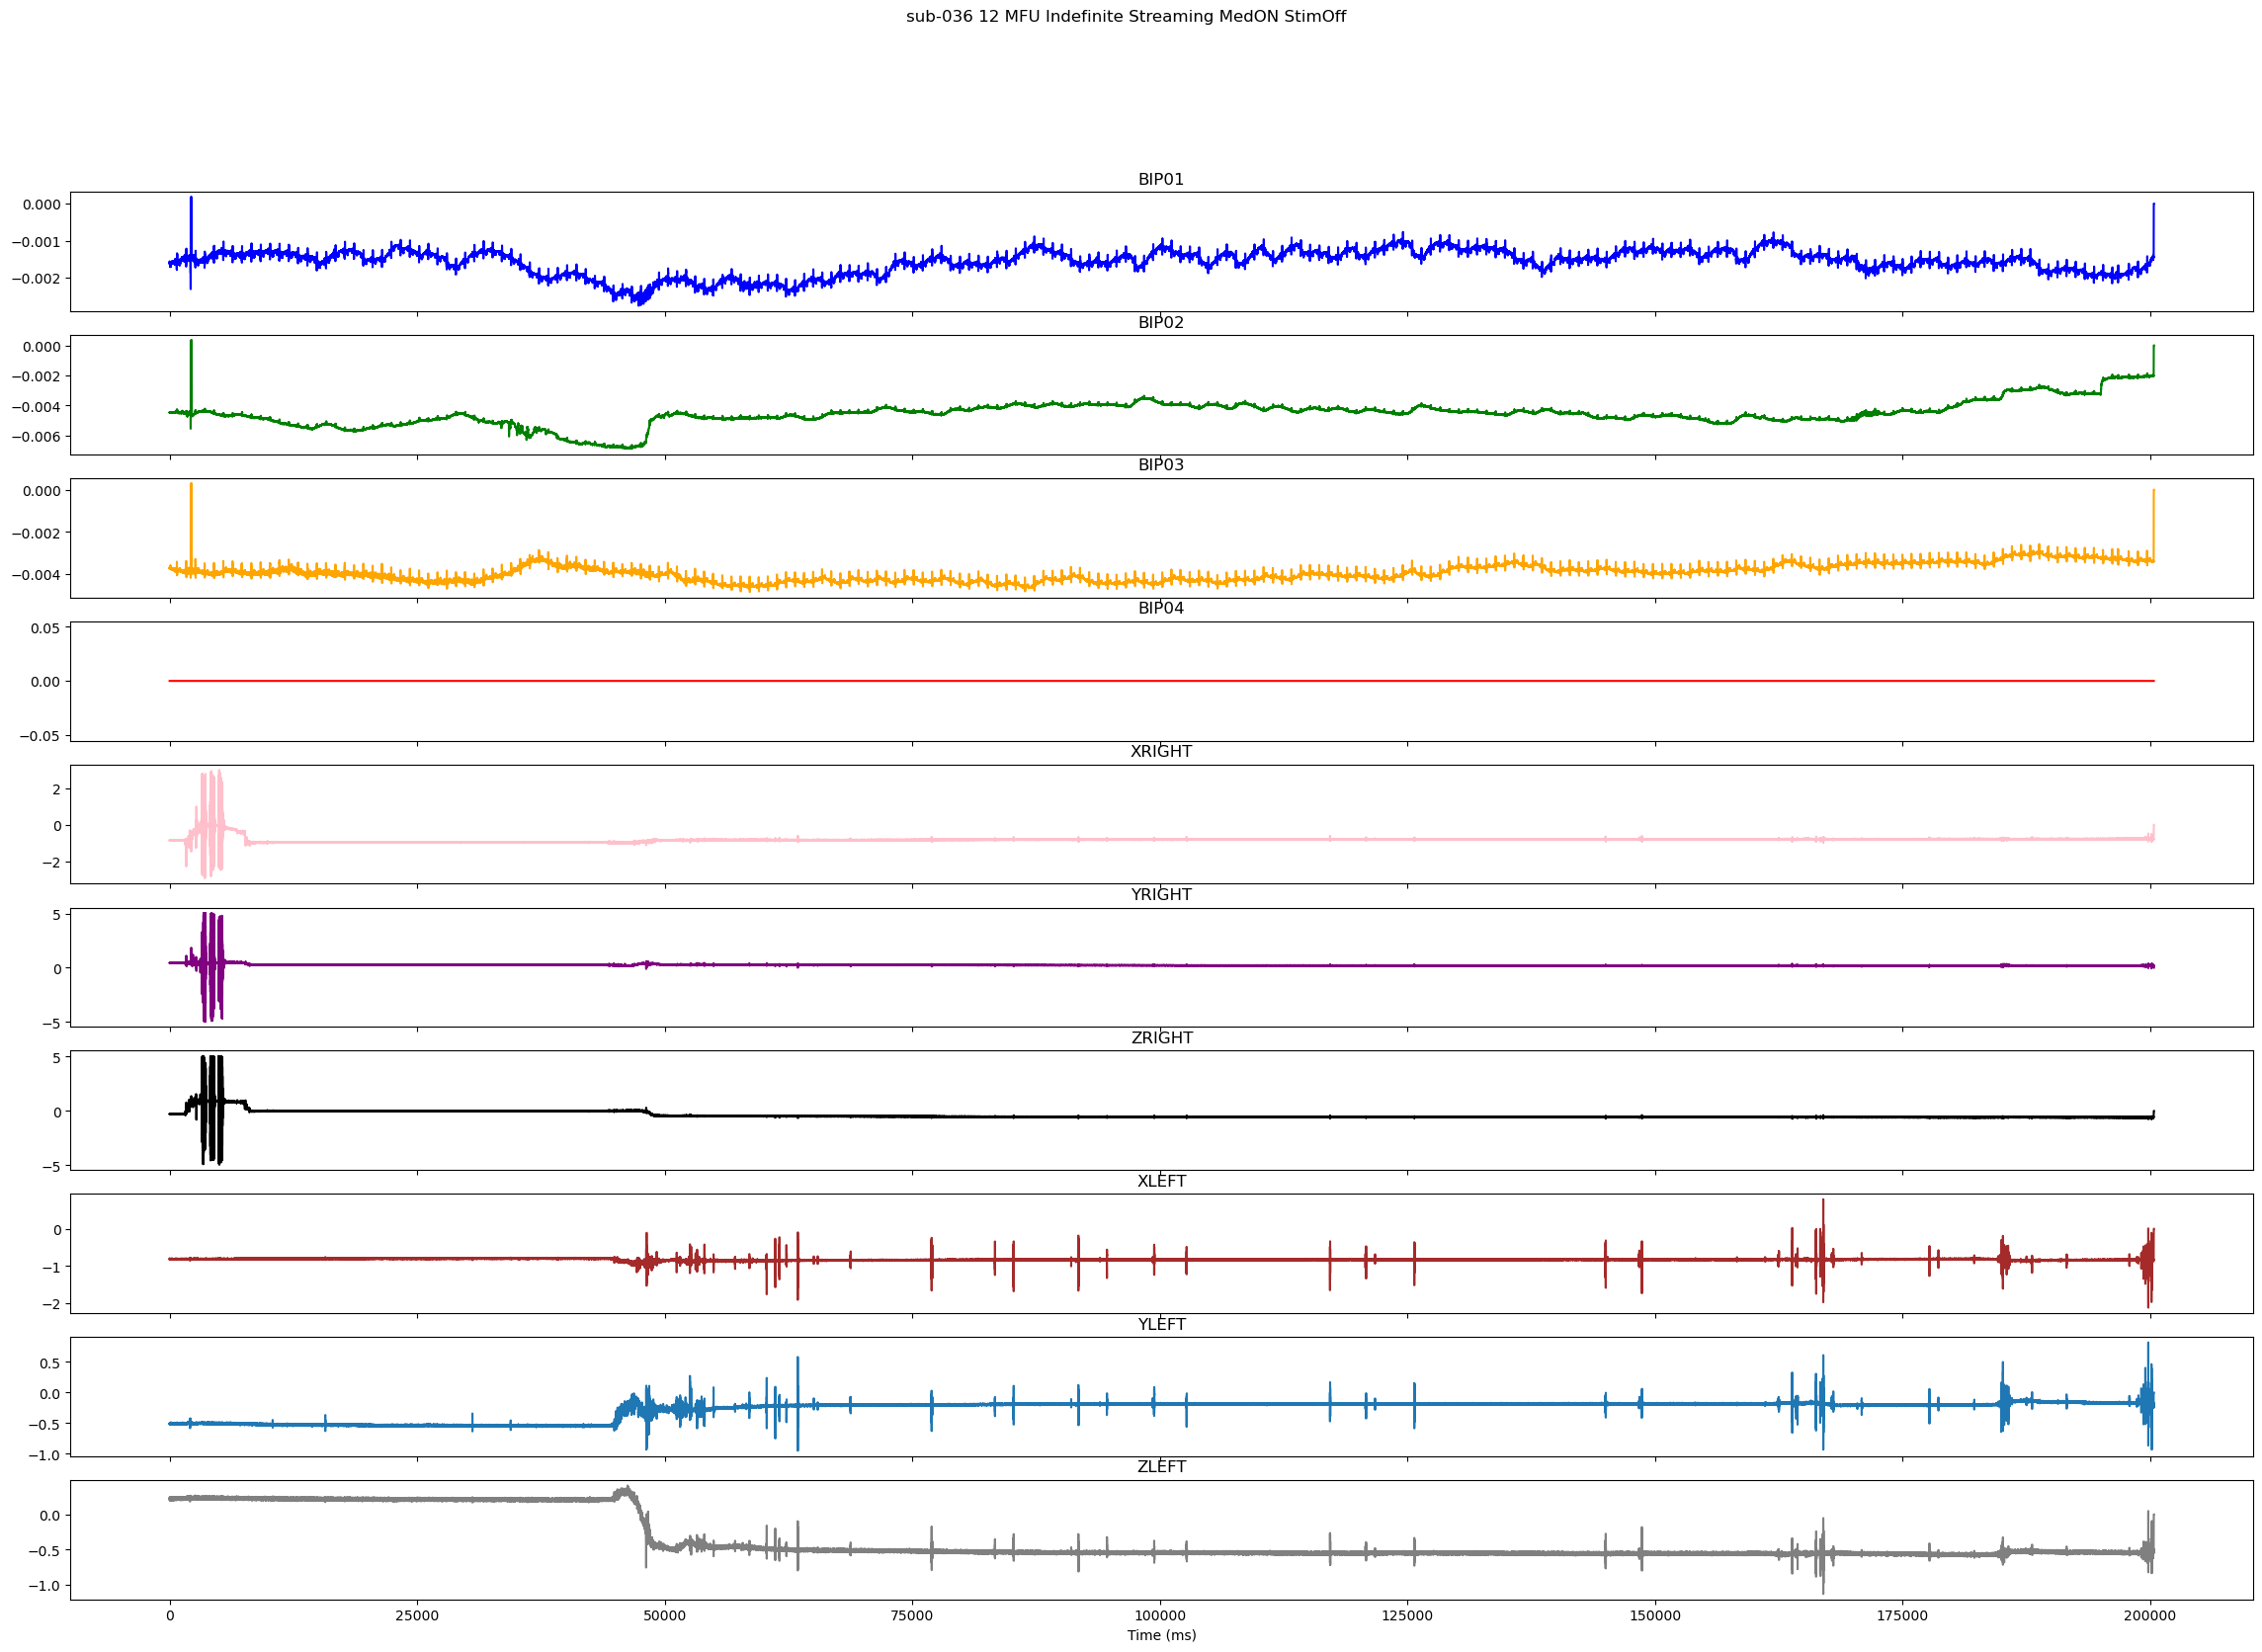

In [13]:
TMSi_data = Poly5Reader()

# Extract the samples and channel names from the Poly5Reader object
samples = TMSi_data.samples
ch_names = TMSi_data.ch_names

# Conversion to MNE raw array

toMNE = True
mne_object = TMSi_data.read_data_MNE()

# Retrieve the MNE RawArray info and sample data
info_mne = mne_object.info
samples_mne = mne_object._data
    
# mne_object.plot(start = 5, duration = 5, n_channels = 2) (only if I want to plot in interactive viewer)

n_chan = len(mne_object.ch_names)
time_duration = (mne_object.n_times/mne_object.info['sfreq']).astype(float)
time_duration_ms=time_duration*1000

print(     
	f'The data object has:\n\t{mne_object.n_times} time samples,'      
	f'\n\tand a sample frequency of {mne_object.info["sfreq"]} Hz'      
	f'\n\twith a recording duration of {time_duration} seconds.'      
	f'\n\t{n_chan} channels were labeled as \n{mne_object.ch_names}.')

x_time=np.arange(0,time_duration_ms,time_duration_ms/mne_object.n_times)


BIP01 = mne_object.get_data()[38]
BIP02 = mne_object.get_data()[39]
BIP03 = mne_object.get_data()[40]
BIP04 = mne_object.get_data()[41]
XRIGHT = mne_object.get_data()[42]
YRIGHT = mne_object.get_data()[43]
ZRIGHT = mne_object.get_data()[44]
XLEFT = mne_object.get_data()[45]
YLEFT = mne_object.get_data()[46]
ZLEFT = mne_object.get_data()[47]

fig, axs = plt.subplots(10)
fig.suptitle('sub-036 12 MFU Indefinite Streaming MedON StimOff')
axs[0].plot(x_time,BIP01,color='blue')
axs[0].set_title('BIP01')
axs[1].plot(x_time,BIP02,color='green')
axs[1].set_title('BIP02')
axs[2].plot(x_time,BIP03,color='orange')
axs[2].set_title('BIP03')
axs[3].plot(x_time,BIP04,color='red')
axs[3].set_title('BIP04')
axs[4].plot(x_time,XRIGHT,color='pink')
axs[4].set_title('XRIGHT')
axs[5].plot(x_time,YRIGHT,color='purple')
axs[5].set_title('YRIGHT')
axs[6].plot(x_time,ZRIGHT,color='black')
axs[6].set_title('ZRIGHT')
axs[7].plot(x_time,XLEFT,color='brown')
axs[7].set_title('XLEFT')
axs[8].plot(x_time,YLEFT)
axs[8].set_title('YLEFT')
axs[9].plot(x_time,ZLEFT,color='grey')
axs[9].set_title('ZLEFT')
axs[9].set_xlabel('Time (ms)')
for ax in axs.flat:
    ax.label_outer()
fig.set_size_inches(28.5, 18.5)	

In [ ]:
mne_object.plot(start = 5, duration = 5, n_channels = 2)

# no artefact except at the end of the recording in BIP01 and BIP02, unrelated to anything based on the video...


**Sub-029 (with Jenny)**

Condition: Sub-029 18MFU M1S0 BrainSense Streaming:

In [15]:
TMSi_data = Poly5Reader()

# Extract the samples and channel names from the Poly5Reader object
samples = TMSi_data.samples
ch_names = TMSi_data.ch_names

# Conversion to MNE raw array

toMNE = True
mne_object = TMSi_data.read_data_MNE()

mne_object.plot(start = 5, duration = 5, n_channels = 2)

Reading file  C:/Users/Juliette/OneDrive - Charité - Universitätsmedizin Berlin/Recordings/TMSi files/sub-036/12MFU/MedON/Sub036_12mfu_M1S0_BStr_Rest__ - 20230201T133415/Sub036_12mfu_M1S0_BStr_Rest__-20230201T133415.DATA.Poly5
	 Number of samples:  1039068 
	 Number of channels:  50 
	 Sample rate: 4096 Hz
Done reading data.
Creating RawArray with float64 data, n_channels=50, n_times=1039068
    Range : 0 ... 1039067 =      0.000 ...   253.678 secs
Ready.


c:\Users\Juliette\Research\Projects\Synchronization project\Code\tmsi-python-interface-main\TMSiFileFormats\file_readers\poly5reader.py:92: RuntimeWarning: Channel names are not unique, found duplicates for: {'Z', 'Y', 'X'}. Applying running numbers for duplicates.
  info = mne.create_info(ch_names=labels, sfreq=fs, ch_types=types_clean)
